In [1]:
%matplotlib inline

### Importing Dependencies

In [2]:
# python imports
import logging
# third party
import matplotlib.pyplot as plt

# qcodes imports
import qcodes as qc
import qcodes.instrument_drivers.agilent.InfiniiVision_reflectometry as DSO
import qcodes.instrument_drivers.agilent.Agilent_33500B as Agilent

#setup
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

### Create the Instrument
please insert the right address of your local scope (TCPIP...) you can find the address with the NI-MAX app or within the network settings of the scope.

In [3]:
dso = DSO.InfiniiVision('DSO', 'USB0::0x0957::0x17A0::MY51500149::INSTR')

Connected to: AGILENT TECHNOLOGIES DSO-X 3104A (serial:MY51500149, firmware:02.41.2015102200) in 0.09s


/Users/sschaal/anaconda/lib/python3.6/site-packages/qcodes-0.1.7-py3.6.egg/qcodes/instrument/parameter.py:207: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


In [4]:
awg=Agilent.Agilent_33500B('AWG', 'GPIB0::10::INSTR', channel=1)

Connected to: Agilent Technologies 33521B (serial:MY52700477, firmware:2.03-1.19-2.00-52-00) in 0.04s


### Prepare Trace


In [5]:
#for i in range(4):
#    dso.channels[i].display(False)
#dso.ch4.display(True) #TRIG
#dso.ch1.display(True) #I
#dso.ch2.display(True) #Q

#dso.ch4.range(5)
#dso.ch4.offset(1)
#dso.trigger_edge_source('CHANnel4')
#dso.trigger_edge_slope('negative')
#dso.ch4.trigger_level(1)

# settings for reflectometry

In [6]:
#dso.ch1.range(1)

#f_rf=83
#dso.timebase_range(1/(2*f_rf))
#dso.timebase_position(-1/(4*f_rf))

In [8]:
dso.acquire_points()

125000

## Data Acquisition


In [14]:
#nPoints = 50000; #numeric data not allowed
#mso.acquire_points(nPoints)# this is not settable for DSO, always 50000
#mso.acquire_sample_rate(nPoints/mso.timebase_range()) # this is not setable for DSO always 5GSa/s

In [5]:
dso.rf_frequency(83)

dso.rf_start(0.1)

dso.rf_end(0.5)

In [6]:
dso.waveform_points(1000)

dso.acquisition_type('AVER')

dso.average_count(10)

In [7]:
dso.rf_trace.setup_reflectometry()
dso.setup_AWG(awg)

In [14]:
dso.timeout(20+int(dso.average_count()/200))

In [8]:
dso.ch1.range(1)

dso.ch2.range(0.1)

In [9]:
data = qc.Measure(dso.rf_trace).run()

DataSet:
   location = 'data/2017-11-15/#010_{name}_14-16-06'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | Sweep_set     | Sweep        | (1000,)
   Measured | DSO_I         | I            | (1000,)
   Measured | DSO_Q         | Q            | (1000,)
   Measured | DSO_magnitude | magnitude    | (1000,)
   Measured | DSO_phase     | phase        | (1000,)
acquired at 2017-11-15 14:16:07


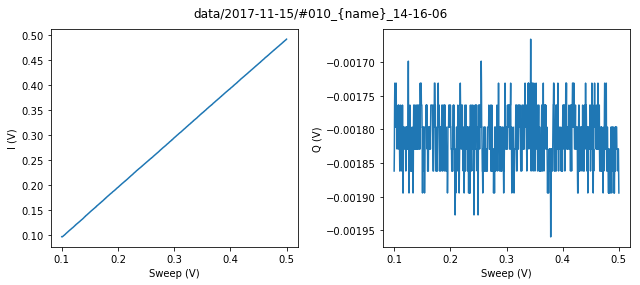

In [10]:
plot = qc.MatPlot(data.DSO_I, data.DSO_Q)